In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import grid_search
from sklearn import cross_validation
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid") 
from IPython.display import display
from IPython.core.pylabtools import getfigs

In [2]:
# get metrics with the best classifier (using l1 regularization),
# plot feature importances with both l1 and l2

In [3]:
# useful links ---
# accuracy with cv - http://scikit-learn.org/stable/modules/cross_validation.html

In [4]:
saveas_path = '/Users/jamie/insight_data/figures/'

In [5]:
%matplotlib qt

In [6]:
X_df = pd.read_pickle('new_X_df.save')
outcomes_df = pd.read_pickle('new_outcomes_df.save')

In [7]:
n_samples = np.shape(X_df)[0]
shuffle_i = np.random.permutation(n_samples)

In [8]:
X = X_df.ix[shuffle_i,:]
y = outcomes_df.ix[shuffle_i,'Outcome'].values
n_samples, n_features = X.shape

In [9]:
from sklearn.externals import joblib
logistic_best = joblib.load('logistic_best_june28/logistic_best.pkl') 

In [36]:
clf = logistic_best # just use clf so it's easier to compare other models

In [11]:
clf.get_params

<bound method LogisticRegression.get_params of LogisticRegression(C=0.1, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)>

In [11]:
from calc_model_cv_metrics import *
%load_ext autoreload
%autoreload 2

In [13]:
plot_roc_with_cv(clf)

(115196,)


In [14]:
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

In [15]:
plt.savefig(saveas_path+'best logistic regression cv auc_3f.png',bbox_inches='tight',dpi=400) 

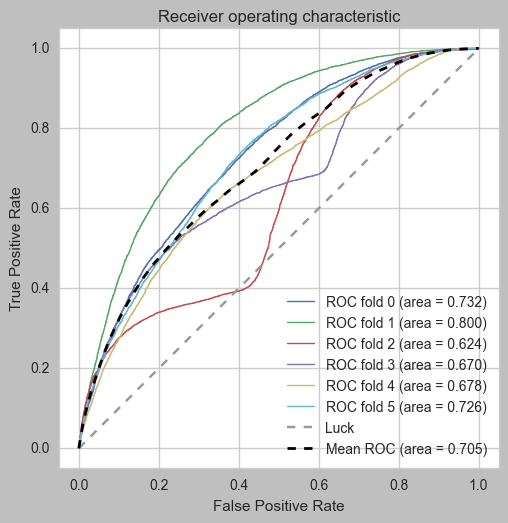

In [16]:
display(plt.gcf())

In [17]:
plt.close('all')

In [18]:
# now get cross validated accuracy, precision, recall, f1 score

In [19]:
scores = cross_validation.cross_val_score(clf, X, y, cv=5)
print "Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

Accuracy: 0.716 (+/- 0.01)


In [21]:
scores = cross_validation.cross_val_score(clf, X, y, \
                                          scoring='precision',cv=5)
print "Precision: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

Precision: 0.637 (+/- 0.01)


In [22]:
scores = cross_validation.cross_val_score(clf, X, y, \
                                          scoring='recall',cv=5)
print "Recall: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

Recall: 0.730 (+/- 0.01)


In [23]:
scores = cross_validation.cross_val_score(clf, X, y, \
                                          scoring='f1',cv=5)
print "F1: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

F1: 0.680 (+/- 0.01)


In [24]:
X_df = pd.read_pickle('new_X_df.save')
X_cols = list(X_df.columns)

In [37]:
# for feature importances, use all data
clf.fit(X,y)

LogisticRegression(C=0.1, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [38]:
X_cols_nice = np.array(['Goal', 'Campaign days', 'Title n words', 'Blurbn words', 'Has video',\
               'N rewards', 'Min reward', 'Median reward', 'Max reward', 'Reward ship days',\
               'N links', 'N figs', 'Body n words', 'N campaigns creator backed',\
               'N campaigns creator created', 'Art', 'Comics', 'Crafts', 'Dance', 'Design',\
               'Fashion', 'Film', 'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing',\
               'Technology', 'Theater', 'International ship', 'Monday launch', 'Tuesday launch',\
               'Wednesday launch', 'Thursday launch', 'Friday launch', 'Saturday launch', 'Sunday launch'])

In [39]:
sns.set_style("whitegrid")
plot_coefficients(clf.coef_[0],X_cols_nice,\
                         len(X_cols_nice),'best logistic regression')

In [40]:
saveas_path = '/Users/jamie/insight_data/figures/'
plt.savefig(saveas_path + 'best logistic regression' + ' feature_importances.png',bbox_inches='tight',dpi=400) 


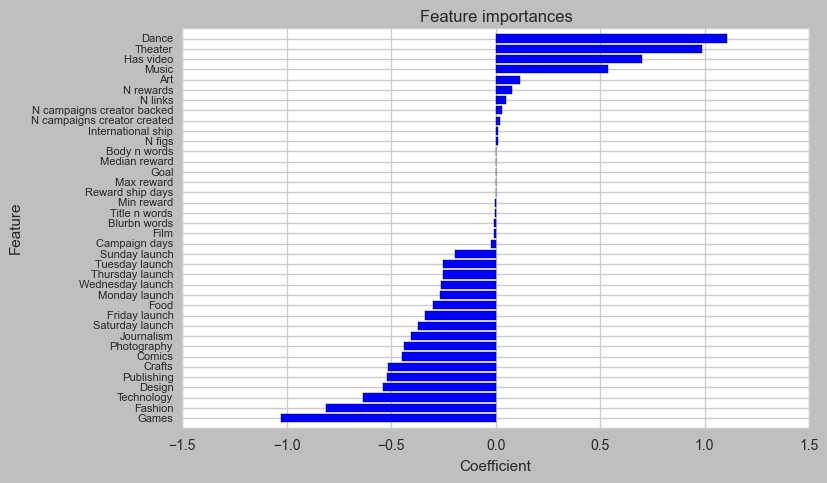

In [18]:
display(plt.gcf())

In [19]:
# now calculate this for the poorer l2 regularized model

In [24]:
logistic_best_l2 = joblib.load('logistic_best_l2_june28/logistic_best_l2.pkl') 

In [25]:
clf = logistic_best_l2

In [28]:
#train on all data
clf.fit(X,y)

LogisticRegression(C=0.0001, class_weight='auto', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

In [32]:
sns.set_style("whitegrid")
plot_coefficients(clf.coef_[0],X_cols_nice,\
                         len(X_cols_nice),'best l2 logistic regression')

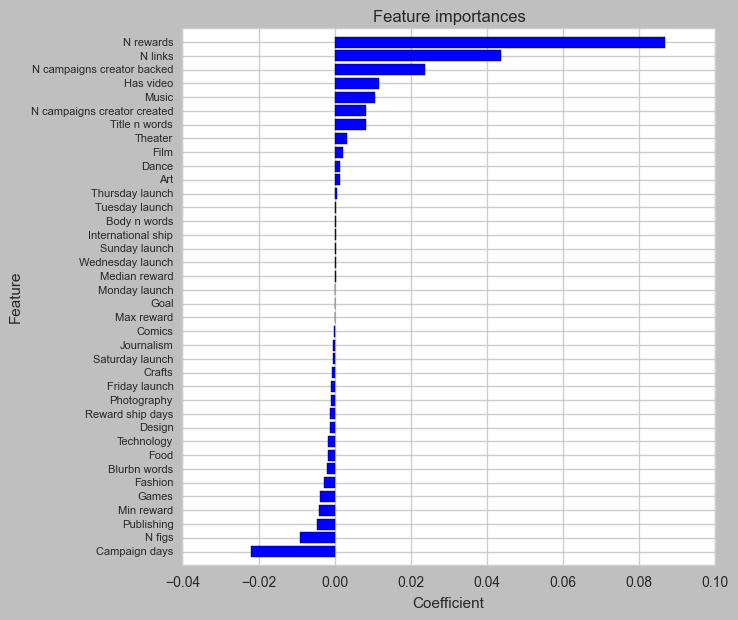

In [33]:
display(plt.gcf())

In [34]:
saveas_path = '/Users/jamie/insight_data/figures/'
plt.savefig(saveas_path + 'best l2 logistic regression' + ' feature_importances.png',bbox_inches='tight',dpi=400) 


In [35]:
plt.gcf().get_size_inches()

array([ 6.875 ,  6.7125])

In [40]:
plot_roc_with_cv(clf)

(115196,)


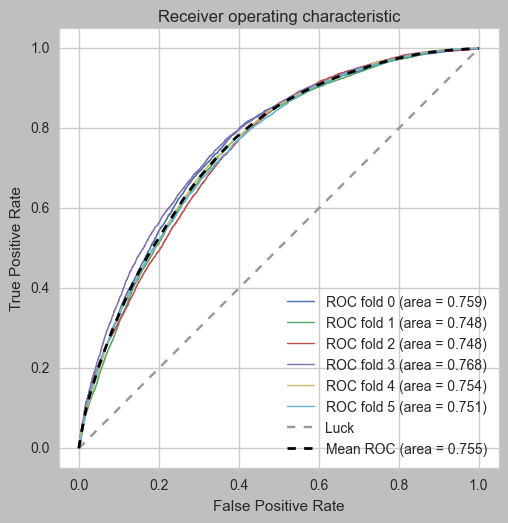

In [41]:
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig(saveas_path+'l2 logistic regression cv auc_3f.png',bbox_inches='tight',dpi=400) 
display(plt.gcf())

In [42]:
scores = cross_validation.cross_val_score(clf, X, y, cv=5)
print "Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

Accuracy: 0.694 (+/- 0.01)


In [43]:
scores = cross_validation.cross_val_score(clf, X, y, \
                                          scoring='precision',cv=5)
print "Precision: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

Precision: 0.616 (+/- 0.01)


In [44]:
scores = cross_validation.cross_val_score(clf, X, y, \
                                          scoring='recall',cv=5)
print "Recall: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

Recall: 0.687 (+/- 0.01)


In [45]:
scores = cross_validation.cross_val_score(clf, X, y, \
                                          scoring='f1',cv=5)
print "F1: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

F1: 0.652 (+/- 0.01)
